In this notebook I'll explore getting the grid corners using ML and the available labelled dataset.

In [1]:
from imageAnalysisGrid import *
import csv
import os
import re
import random

## Set up folder source images

In [2]:
# set up folders
#imageDataDir = 'C:\\Users\\tequi\\Documents\\repos\\sudoku_dataset\\images\\'
imageDataDir = 'C:\\Users\\JOSA\\Documents\\imagesRepo\\sudoku_dataset\\images\\'

allImages = []
for file in os.listdir(imageDataDir):
    if file.endswith(".jpg"):
        allImages.append(file)
        
# labelled corners
#labelledCornersDir = 'C:\\Users\\tequi\\Documents\\repos\\sudoku_dataset\\outlines_sorted.csv'
labelledCornersDir = 'C:\\Users\\JOSA\\Documents\\imagesRepo\\sudoku_dataset\\outlines_sorted.csv'

# read in the labels as a dictionary
image = []
p1_x = []
p1_y = []
p2_x = []
p2_y = []
p3_x = []
p3_y = []
p4_x = []
p4_y = []
with open(labelledCornersDir) as csv_file:
    labelledCorners = csv.reader(csv_file)
    line_count = 0
    for row in labelledCorners:
        if line_count > 0:
            tmpPath = row[0]
            tmpPath = re.sub('./images/', '', tmpPath)
            image.append(tmpPath)
            p1_x.append(int(row[1]))
            p1_y.append(int(row[2]))
            p2_x.append(int(row[3]))
            p2_y.append(int(row[4]))
            p3_x.append(int(row[5]))
            p3_y.append(int(row[6]))
            p4_x.append(int(row[7]))
            p4_y.append(int(row[8]))
        line_count = line_count + 1

cornersDict = {
    'image' : image,
    'p1_x' : p1_x,
    'p1_y' : p1_y,
    'p2_x' : p2_x,
    'p2_y' : p2_y,
    'p3_x' : p3_x,
    'p3_y' : p3_y,
    'p4_x' : p4_x,
    'p4_y' : p4_y
}

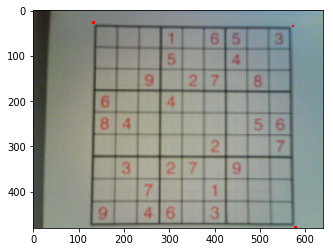

In [13]:
# check on one img
chosenImg = 8
pxlEnlarg = 3
filename = os.path.join(imageDataDir, cornersDict['image'][chosenImg])
img = io.imread(filename)

img[cornersDict['p1_y'][chosenImg]-pxlEnlarg:cornersDict['p1_y'][chosenImg]+pxlEnlarg,
    cornersDict['p1_x'][chosenImg]-pxlEnlarg:cornersDict['p1_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p1_y'][chosenImg]-pxlEnlarg:cornersDict['p1_y'][chosenImg]+pxlEnlarg,
    cornersDict['p1_x'][chosenImg]-pxlEnlarg:cornersDict['p1_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p1_y'][chosenImg]-pxlEnlarg:cornersDict['p1_y'][chosenImg]+pxlEnlarg,
    cornersDict['p1_x'][chosenImg]-pxlEnlarg:cornersDict['p1_x'][chosenImg]+pxlEnlarg,
   2] = 0

img[cornersDict['p2_y'][chosenImg]-pxlEnlarg:cornersDict['p2_y'][chosenImg]+pxlEnlarg,
    cornersDict['p2_x'][chosenImg]-pxlEnlarg:cornersDict['p2_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p2_y'][chosenImg]-pxlEnlarg:cornersDict['p2_y'][chosenImg]+pxlEnlarg,
    cornersDict['p2_x'][chosenImg]-pxlEnlarg:cornersDict['p2_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p2_y'][chosenImg]-pxlEnlarg:cornersDict['p2_y'][chosenImg]+pxlEnlarg,
    cornersDict['p2_x'][chosenImg]-pxlEnlarg:cornersDict['p2_x'][chosenImg]+pxlEnlarg,
   2] = 0

img[cornersDict['p3_y'][chosenImg]-pxlEnlarg:cornersDict['p3_y'][chosenImg]+pxlEnlarg,
    cornersDict['p3_x'][chosenImg]-pxlEnlarg:cornersDict['p3_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p3_y'][chosenImg]-pxlEnlarg:cornersDict['p3_y'][chosenImg]+pxlEnlarg,
    cornersDict['p3_x'][chosenImg]-pxlEnlarg:cornersDict['p3_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p3_y'][chosenImg]-pxlEnlarg:cornersDict['p3_y'][chosenImg]+pxlEnlarg,
    cornersDict['p3_x'][chosenImg]-pxlEnlarg:cornersDict['p3_x'][chosenImg]+pxlEnlarg,
   2] = 0

img[cornersDict['p4_y'][chosenImg]-pxlEnlarg:cornersDict['p4_y'][chosenImg]+pxlEnlarg,
    cornersDict['p4_x'][chosenImg]-pxlEnlarg:cornersDict['p4_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p4_y'][chosenImg]-pxlEnlarg:cornersDict['p4_y'][chosenImg]+pxlEnlarg,
    cornersDict['p4_x'][chosenImg]-pxlEnlarg:cornersDict['p4_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p4_y'][chosenImg]-pxlEnlarg:cornersDict['p4_y'][chosenImg]+pxlEnlarg,
    cornersDict['p4_x'][chosenImg]-pxlEnlarg:cornersDict['p4_x'][chosenImg]+pxlEnlarg,
   2] = 0

plt.imshow(img)
plt.show()


plan:

* get candidate pxls for corners with thresholding (pick darkers areas)
* use some feature to consider that a corner has black pixels on only 2 sides around it
* restrict area of search by assuming that a corner should be in one specific portion of the image

alternatively, use the 4 points to get 'area of image in grid' vs 'not in grid'

#use texture features on patches with size min(shape/10). This should guarantee to cover areas with grids, not just inside the grids (pacth too small)


AT THE END, CALC PROBS AND ADJUST BY A PROB FACTOR CONSIDERING THAT IT SHOULD BE A SQUARE STARTING FROM THE MIDDLE OF THE IMAGE
and normalized by the number of votes to a specific area

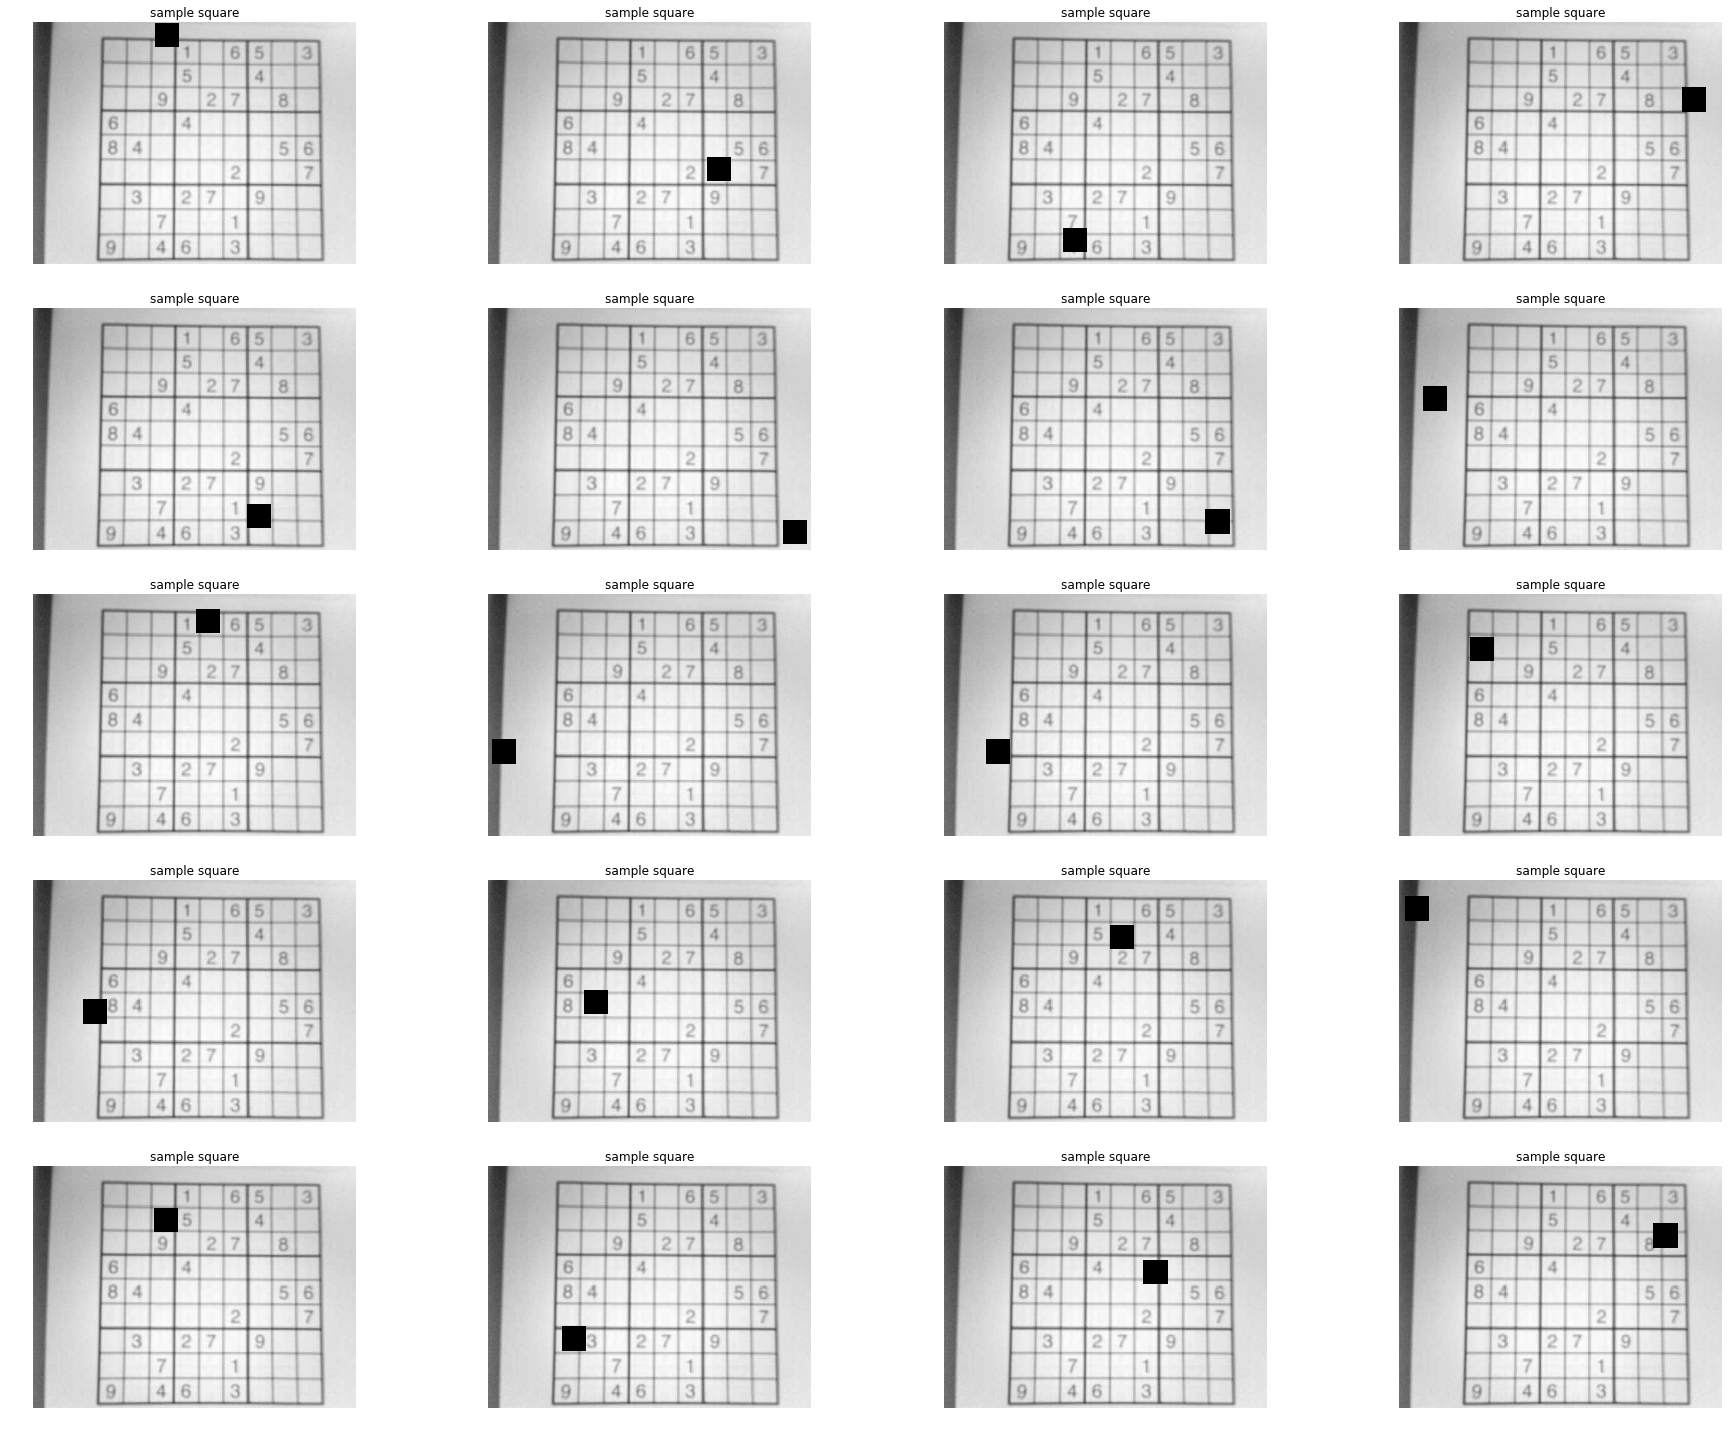

In [14]:
#get patch size

imgGray = readImg(filename)
PATCH_SIZE = int(np.amin(imgGray.shape)/10)

rowStart = list(range(0, imgGray.shape[0] - PATCH_SIZE - 1))
colStart = list(range(0, imgGray.shape[1] - PATCH_SIZE - 1))

#smaple 1000 squaresCoord (the max we can fit in a pic would be imgGray.shape[0]*imgGray.shape[1]/PATCH_SIZE**2)
allRowStarts = random.choices(rowStart, k=1000)
allColStarts = random.choices(colStart, k=1000)

#check we got valid squares
fig, axes = plt.subplots(5, 4, figsize=(26, 20))
ax = axes.ravel()
for i in range(0, 20):
    img = imgGray.copy()
    img[allRowStarts[i]:allRowStarts[i]+PATCH_SIZE,
       allColStarts[i]:allColStarts[i]+PATCH_SIZE] = 0
    ax[i].imshow(img, cmap=plt.cm.gray)
    ax[i].set_axis_off()
    ax[i].set_title('sample square')
plt.tight_layout()
plt.show()
    

for training, we need to create the squares INSIDE the sudoku grid, so we need to restric allRows and allCols to areas inside/outside the grid, as determined by the 4 labelled coordinates points.


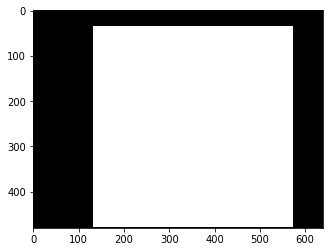

% in = 63.8
the grid covers % of image: 63.451171875


In [29]:
#get coords for sure inside sudoku grid

#key from labels notation:
#p1: top-left
#p2: top-right
#p3: bottom-right
#p4 bottom-left

minRow = np.amax([cornersDict['p1_y'][chosenImg], cornersDict['p2_y'][chosenImg]])
maxRow = np.amin([cornersDict['p3_y'][chosenImg], cornersDict['p4_y'][chosenImg]])

minCol = np.amax([cornersDict['p1_x'][chosenImg], cornersDict['p4_x'][chosenImg]])
maxCol = np.amin([cornersDict['p2_x'][chosenImg], cornersDict['p3_x'][chosenImg]])

gridInOut = np.zeros((imgGray.shape[0], imgGray.shape[1]))
gridInOut[minRow:maxRow, minCol:maxCol] = 1

#if I sample 100 squares, how many are in (90% of area in) and how many are out
areaPatch = PATCH_SIZE**2
sqrtIn = 0
for i in range(0, len(allRowStarts)):
    sqrtCons = gridInOut[allRowStarts[i]:allRowStarts[i]+PATCH_SIZE,
                         allColStarts[i]:allColStarts[i]+PATCH_SIZE]
    # % area in
    percIn = np.sum(sqrtCons)/areaPatch
    if percIn > 0.9:
        sqrtIn = sqrtIn + 1
print('% in = ' + str((100*sqrtIn)/len(allRowStarts)))
print('the grid covers % of image: ' + str (100*(np.sum(gridInOut)/(gridInOut.shape[0]*gridInOut.shape[1]))))

The two percentages are similar, so sampling 1000 squares should be representative of our image

# Get features GLCM

In [94]:
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import warnings
warnings.filterwarnings('ignore')


def computeGLCMSingleImg(img, refGrid, allRowStarts, allColStarts, nSquares, PATCH_SIZE):
    img255 = img_as_ubyte(img)
    allxs = []
    allys = []
    all_contrast = []
    all_homogeneity = []
    all_energy = []
    all_ASM = []
    sqrtClass = []
    saveCoords = []
    areaPatch = PATCH_SIZE**2
    for i in range(nSquares):
        thisSquare = refGrid[allRowStarts[i]:allRowStarts[i]+PATCH_SIZE,
                             allColStarts[i]:allColStarts[i]+PATCH_SIZE]
        # % area in
        percIn = np.sum(thisSquare)/areaPatch
        if percIn > 0.9:
            sqrtClass.append('inside')
        else :
            sqrtClass.append('outside')
        patch = img255[allRowStarts[i]:allRowStarts[i]+PATCH_SIZE,
                       allColStarts[i]:allColStarts[i]+PATCH_SIZE]
        glcm = greycomatrix(patch, [2], [0], 256, symmetric=True, normed=True)
        #xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
        #ys.append(greycoprops(glcm, 'correlation')[0, 0])
        allxs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
        allys.append(greycoprops(glcm, 'correlation')[0, 0])
        all_contrast.append(greycoprops(glcm, 'contrast')[0, 0])
        all_homogeneity.append(greycoprops(glcm, 'homogeneity')[0, 0])
        all_energy.append(greycoprops(glcm, 'energy')[0, 0])
        all_ASM.append(greycoprops(glcm, 'ASM')[0, 0])
    
    return ([allxs, allys, all_contrast, all_homogeneity, all_energy, all_ASM, sqrtClass])


In [57]:
glcm_results = computeGLCMSingleImg(imgGray, gridInOut, allRowStarts, allColStarts, 1000, PATCH_SIZE)
all_dissimilarity = glcm_results[0]
all_correlation = glcm_results[1]
all_contrast = glcm_results[2]
all_homogeneity = glcm_results[3]
all_energy = glcm_results[4]
all_ASM = glcm_results[5]
sqrtClasses = glcm_results[6]

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

def datasetsStats(y_train, y_test, y_validation):
    print('Train dataset:')
    print('Total patches: ', len(y_train))
    print('Inside patches: ', len([i for i in y_train if i == 'inside']))
    print('Outside patches: ', len([i for i in y_train if i == 'outside']))
    print()
    print('Test dataset:')
    print('Total patches: ', len(y_test))
    print('Inside patches: ', len([i for i in y_test if i == 'inside']))
    print('Outside patches: ', len([i for i in y_test if i == 'outside']))
    print()
    print('Validation dataset:')
    print('Total patches: ', len(y_validation))
    print('Inside patches: ', len([i for i in y_validation if i == 'inside']))
    print('Outside patches: ', len([i for i in y_validation if i == 'outside']))
    
#as a simaple footprint, divide this single images asquares into train/test

#put all features together
allFeatures = [all_dissimilarity, all_correlation, all_contrast, all_homogeneity, all_energy, all_ASM]
allFeatures = np.transpose(np.array(allFeatures))
allFeatures = scale(allFeatures)

#using a 80/10/10 split
X, y = allFeatures, sqrtClass
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.1, random_state = 1234)

datasetsStats(y_train, y_test, y_validation)

Train dataset:
Total patches:  810
Inside patches:  514
Outside patches:  296

Test dataset:
Total patches:  100
Inside patches:  67
Outside patches:  33

Validation dataset:
Total patches:  90
Inside patches:  57
Outside patches:  33


Using these information we train some models on the train dataset using:
    
* svm
* tree
* decision tree

In [76]:
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def TuneModel(clf, y_labels, X_data, modelName):
    print('Model: ' + modelName)
    print()
    # print("Grid scores on development set:")
    # print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    allMeans = []
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        # print("%0.3f (+/-%0.03f) for %r"
        #        % (mean, std * 2, params))
        allMeans.append(mean)
    # print()
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Accuracy (against train dataset): " + str(max(allMeans)))
    #print()
    #print('Confusion Matrix:')
    #print(confusion_matrix(y_labels, clf.predict(X_data)))
    print(20*'*')
    print()

    
#svm
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train, y_train)

TuneModel(clf, y_train, X_train, 'SVM')

#knn
tuned_parameters = [{'leaf_size': [10, 20, 30, 40, 50, 60], 'n_neighbors': [2, 5, 10, 15, 20, 25, 30, 35],
                     'p': [2, 4, 6, 8]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train, y_train)
TuneModel(clf, y_train, X_train, 'knn')

#rf
tuned_parameters = [{'n_estimators': [50, 100, 200], 'max_depth': [2, 5, 10, 15, 20, 25, 30, 35]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train, y_train)
TuneModel(clf, y_train, X_train, 'Random Forest')

#decision tree
tuned_parameters = [{'criterion': ['gini', 'entropy']}]
clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train, y_train)
TuneModel(clf, y_train, X_train, 'Decision Tree')

Model: SVM

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Accuracy (against train dataset): 0.6345679012345679
********************

Model: knn

Best parameters set found on development set:

{'leaf_size': 30, 'n_neighbors': 30, 'p': 2}

Accuracy (against train dataset): 0.6246913580246913
********************

Model: Random Forest

Best parameters set found on development set:

{'max_depth': 2, 'n_estimators': 50}

Accuracy (against train dataset): 0.6259259259259259
********************

Model: Decision Tree

Best parameters set found on development set:

{'criterion': 'entropy'}

Accuracy (against train dataset): 0.5839506172839506
********************



As accurate as tossing a coin...

Let's try to change PATCH_SIZE (and for speed we work on 200 patches only)

In [96]:
chosenImg = 8
patchSize_dividend = [5, 10, 15, 20]
nPatches = 200
filename = os.path.join(imageDataDir, cornersDict['image'][chosenImg])
imgGr = readImg(filename)

for thisSize in patchSize_dividend:
    print('Size used: ' + str(thisSize))
    PATCH_SIZE = int(np.amin(imgGray.shape)/thisSize)

    rowStart = list(range(0, imgGray.shape[0] - PATCH_SIZE - 1))
    colStart = list(range(0, imgGray.shape[1] - PATCH_SIZE - 1))

    #sample n squaresCoord
    allRowStarts = random.choices(rowStart, k=nPatches)
    allColStarts = random.choices(colStart, k=nPatches)

    minRow = np.amax([cornersDict['p1_y'][chosenImg], cornersDict['p2_y'][chosenImg]])
    maxRow = np.amin([cornersDict['p3_y'][chosenImg], cornersDict['p4_y'][chosenImg]])

    minCol = np.amax([cornersDict['p1_x'][chosenImg], cornersDict['p4_x'][chosenImg]])
    maxCol = np.amin([cornersDict['p2_x'][chosenImg], cornersDict['p3_x'][chosenImg]])

    gridInOut = np.zeros((imgGray.shape[0], imgGray.shape[1]))
    gridInOut[minRow:maxRow, minCol:maxCol] = 1


    glcm_results = computeGLCMSingleImg(imgGray, gridInOut, allRowStarts, allColStarts, nPatches, PATCH_SIZE)
    all_dissimilarity = glcm_results[0]
    all_correlation = glcm_results[1]
    all_contrast = glcm_results[2]
    all_homogeneity = glcm_results[3]
    all_energy = glcm_results[4]
    all_ASM = glcm_results[5]
    sqrtClass = glcm_results[6]

    #put all features together
    allFeatures = [all_dissimilarity, all_correlation, all_contrast, all_homogeneity, all_energy, all_ASM]
    allFeatures = np.transpose(np.array(allFeatures))
    allFeatures = scale(allFeatures)

    #using a 80/10/10 split
    X, y = allFeatures, sqrtClass
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.1, random_state = 1234)

    #svm
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')
    clf.fit(X_train, y_train)

    TuneModel(clf, y_train, X_train, 'SVM')

    #knn
    tuned_parameters = [{'leaf_size': [10, 20, 30, 40, 50, 60], 'n_neighbors': [2, 5, 10, 15, 20, 25, 30, 35],
                     'p': [2, 4, 6, 8]}]

    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5,
                       scoring='accuracy')
    clf.fit(X_train, y_train)
    TuneModel(clf, y_train, X_train, 'knn')

    #rf
    tuned_parameters = [{'n_estimators': [50, 100, 200], 'max_depth': [2, 5, 10, 15, 20, 25, 30, 35]}]

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                       scoring='accuracy')
    clf.fit(X_train, y_train)
    TuneModel(clf, y_train, X_train, 'Random Forest')

    #decision tree
    tuned_parameters = [{'criterion': ['gini', 'entropy']}]
    clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5,
                       scoring='accuracy')
    clf.fit(X_train, y_train)
    TuneModel(clf, y_train, X_train, 'Decision Tree')

Size used: 5
Model: SVM

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Accuracy (against train dataset): 0.8827160493827161
********************

Model: knn

Best parameters set found on development set:

{'leaf_size': 10, 'n_neighbors': 15, 'p': 6}

Accuracy (against train dataset): 0.8395061728395061
********************

Model: Random Forest

Best parameters set found on development set:

{'max_depth': 15, 'n_estimators': 50}

Accuracy (against train dataset): 0.8580246913580247
********************

Model: Decision Tree

Best parameters set found on development set:

{'criterion': 'gini'}

Accuracy (against train dataset): 0.7962962962962963
********************

Size used: 10
Model: SVM

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Accuracy (against train dataset): 0.7654320987654321
********************

Model: knn

Best parameters set found on development set:

{'leaf_size': 10, 'n_neighbors': 2, '

It looks like a size of % and SVM gives the best performance. The issue could be that a size of 5 is quite big, so most of the pixels will be labelled as 'inside' anyway. Let's dig a bit more into this.

In [165]:
# Confusion matrix for size 5, SVM

chosenImg = 8
patchSize_dividend = 10
nPatches = 1000
filename = os.path.join(imageDataDir, cornersDict['image'][chosenImg])
imgGr = readImg(filename)

PATCH_SIZE = int(np.amin(imgGray.shape)/patchSize_dividend)

rowStart = list(range(0, imgGray.shape[0] - PATCH_SIZE - 1))
colStart = list(range(0, imgGray.shape[1] - PATCH_SIZE - 1))


#sample n squaresCoord
allRowStarts = random.choices(rowStart, k=nPatches)
allColStarts = random.choices(colStart, k=nPatches)

minRow = np.amax([cornersDict['p1_y'][chosenImg], cornersDict['p2_y'][chosenImg]])
maxRow = np.amin([cornersDict['p3_y'][chosenImg], cornersDict['p4_y'][chosenImg]])

minCol = np.amax([cornersDict['p1_x'][chosenImg], cornersDict['p4_x'][chosenImg]])
maxCol = np.amin([cornersDict['p2_x'][chosenImg], cornersDict['p3_x'][chosenImg]])

gridInOut = np.zeros((imgGray.shape[0], imgGray.shape[1]))
gridInOut[minRow:maxRow, minCol:maxCol] = 1


glcm_results = computeGLCMSingleImg(imgGray, gridInOut, allRowStarts, allColStarts, nPatches, PATCH_SIZE)
all_dissimilarity = glcm_results[0]
all_correlation = glcm_results[1]
all_contrast = glcm_results[2]
all_homogeneity = glcm_results[3]
all_energy = glcm_results[4]
all_ASM = glcm_results[5]
sqrtClass = glcm_results[6]

#put all features together
# we add ot the feaures an id which we can then use to get the squre coords.
# The id will be removed from the datasets before training.
allFeatures = [all_dissimilarity, all_correlation, all_contrast, all_homogeneity, all_energy, all_ASM, list(range(len(all_ASM)))]
allFeatures = np.transpose(np.array(allFeatures))
allFeatures = scale(allFeatures)

#using a 80/10/10 split
X, y = allFeatures, sqrtClass
#add an ID column
X = np.c_[ X, np.array(list(range(nPatches))) ] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.1, random_state = 1234)

#remove the id column and store it

train_ids = X_train[:,7]
test_ids = X_test[:,7]
validation_ids = X_validation[:,7]
X_train = X_train[:,0:6]
X_test = X_test[:,0:6]
X_validation = X_validation[:,0:6]

#svm
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5,
                   scoring='accuracy')
clf.fit(X_train, y_train)

TuneModel(clf, y_train, X_train, 'SVM')
print('Confusion Matrix:')
print(confusion_matrix(y_train, clf.predict(X_train)))
 
datasetsStats(y_train, y_test, y_validation)

Model: SVM

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Accuracy (against train dataset): 0.7641975308641975
********************

Confusion Matrix:
[[465  21]
 [157 167]]
Train dataset:
Total patches:  810
Inside patches:  486
Outside patches:  324

Test dataset:
Total patches:  100
Inside patches:  53
Outside patches:  47

Validation dataset:
Total patches:  90
Inside patches:  54
Outside patches:  36


As expected, the model is biased towards the `inside`. What if I just believe the inside anyway? The rest is automatically outside. Let's see how a vote-corrected grid would look like

We can also add the feature 'distance of centre of patch from the nearest image edge`

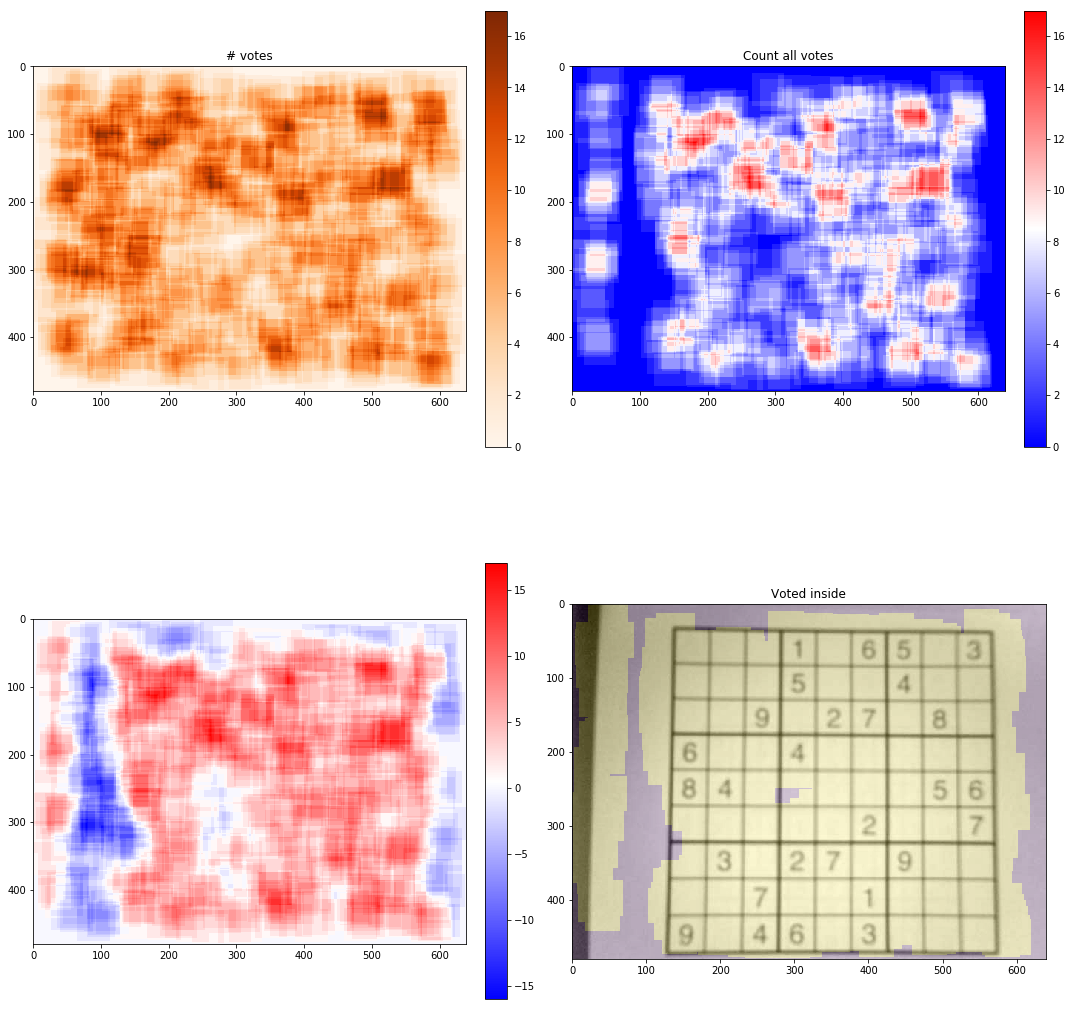

In [169]:
def heatmap(data, ax=None,
            cbar_kw={}, **kwargs):
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04, **cbar_kw)

    return im, cbar

voteGrid = np.zeros((imgGray.shape[0], imgGray.shape[1]))
voteResGrid = np.zeros((imgGray.shape[0], imgGray.shape[1]))
voteGridBinary = np.zeros((imgGray.shape[0], imgGray.shape[1]))
countingvoteOutside = np.zeros((imgGray.shape[0], imgGray.shape[1]))
outcome = clf.predict(X_train)
for i in range(len(outcome)):
    xPos = allRowStarts[int(train_ids[i])]
    yPos = allColStarts[int(train_ids[i])]
    voteGrid[xPos : xPos+PATCH_SIZE, yPos : yPos+PATCH_SIZE] = voteGrid[xPos : xPos+PATCH_SIZE,
                                                                        yPos : yPos+PATCH_SIZE] + 1
    if outcome[i] == 'inside':
        voteResGrid[xPos : xPos+PATCH_SIZE, yPos : yPos+PATCH_SIZE] = voteResGrid[xPos : xPos+PATCH_SIZE,
                                                                                  yPos : yPos+PATCH_SIZE] + 1
        countingvoteOutside[xPos : xPos+PATCH_SIZE,
                            yPos : yPos+PATCH_SIZE] = countingvoteOutside[xPos : xPos+PATCH_SIZE,
                                                                          yPos : yPos+PATCH_SIZE] + 1  
        voteGridBinary[xPos : xPos+PATCH_SIZE, yPos : yPos+PATCH_SIZE] = 1
    else:
        countingvoteOutside[xPos : xPos+PATCH_SIZE,
                            yPos : yPos+PATCH_SIZE] = countingvoteOutside[xPos : xPos+PATCH_SIZE,
                                                                          yPos : yPos+PATCH_SIZE] - 1  
        


fig, ax = plt.subplots(2,2, figsize = (15, 16))
    
im0, cbar0 = heatmap(voteGrid, ax=ax.flat[0],
                   cmap="Oranges")
im1, cbar1 = heatmap(voteResGrid, ax=ax.flat[1],
                   cmap="bwr")
im2, cbar2 = heatmap(countingvoteOutside, ax=ax.flat[2],
                   cmap="bwr")
ax.flat[0].set_title('# votes')
ax.flat[1].set_title('Voted inside')
ax.flat[1].set_title('Count all votes')
ax.flat[3].imshow(imgGray, cmap=plt.cm.gray)
ax.flat[3].imshow(voteGridBinary, alpha = 0.2)
ax.flat[3].set_title('Voted inside')

#     ax.flat[2].imshow(image, cmap = 'gray')
#     ax.flat[2].imshow(compositeImg, alpha = 0.2)
#     ax.flat[3].imshow(image, cmap = 'gray')
#     ax.flat[2].set_title(idxFil[imgIdx])
#     ax.flat[3].set_title(idxFil[imgIdx])
fig.tight_layout()
plt.show()
